## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [96]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [97]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [98]:
df.shape

(294478, 5)

There are 294478 rows and 5 cells.
***

c. The number of unique users in the dataset.

In [99]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [100]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [101]:

no_match = df[(df["group"] == "treatment") != (df["landing_page"] == "new_page")]

no_match.count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [103]:
df.isnull().values.any()

False

No missing values in the rows.
***

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [104]:
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)


In [105]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [106]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [107]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


The user with the entry of user_id 773192
***

c. What is the row information for the repeat **user_id**? 

In [108]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [109]:
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-09 05:37:58.781806')].index)
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [110]:
converted_users2 = float(df2.query('converted == 1')['user_id'].nunique())
convert_p = converted_users2/float(df2.shape[0])
convert_p

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [111]:
converted_control_users = float(df2.query('converted == 1 and group == "control"')['user_id'].nunique())
users =float(df2.query('group == "control"')['user_id'].nunique())
control_p = converted_control_users /users
control_p

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [112]:
converted_control_users = (df2.query('converted == 1 and group == "treatment"')['user_id'].nunique())
treat_users =(df2.query('group == "treatment"')['user_id'].nunique())
treatment_p = converted_control_users /treat_users
treatment_p

0.11880806551510564

d. What is the probability that an individual received the new page?

In [113]:
new_page_users = (df2.query('landing_page == "new_page"')['user_id'].nunique())
new_page_p = new_page_users/(df2.shape[0])
new_page_p

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**First, let's stack the evidances:**
<pre>A. The probability of an individual converting regardless of the page they receive is 11.96%</pre>

<pre>B. The probability of an individual converting given that it was in the control group is 12.04% </pre>

<pre>C. The probability of an individual converting given that it was in the treatment group is 11.88%</pre>

<pre>D. The probability that an individual received the new page is 50.01%</pre>

**From B and C, we cannot conclude that the new treatment page will lead to more conversions.**
***

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Hypotheses are, 
\begin{equation*} H_0:p_{new}−p_{old}≤0 \end{equation*}
 \begin{equation*} H_1:p_{new}−p_{old}>0  \end{equation*}
 <br>Where $H_0$ is null hypothesis, and $H_1$ is alternative hypothesis
 
 ***

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [114]:
p_new = round(float(df2.query('converted == 1')['user_id'].nunique())/float(df2['user_id'].nunique()),4)

p_new

0.1196

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [115]:
p_old = round(float(df2.query('converted == 1')['user_id'].nunique())/float(df2['user_id'].nunique()),4)

p_old

0.1196

c. What is $n_{new}$?

In [116]:
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

n_new

145310

d. What is $n_{old}$?

In [117]:
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique() 

n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [118]:

new_page_converted = np.random.choice([0, 1], size = n_new, p = [p_new, 1 - p_new])

new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [119]:

old_page_converted = np.random.choice([0, 1], size = n_old, p = [p_old, 1 - p_old])

old_page_converted

array([1, 1, 1, ..., 1, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [120]:
new_page_converted.mean() - old_page_converted.mean()


-0.0010649891206225837

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [121]:
new_converted_simulation = \
    np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = \
    np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

p_diffs

array([ 0.00198009,  0.00067927, -0.00201885, ..., -0.00056646,
        0.00032149, -0.00075918])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

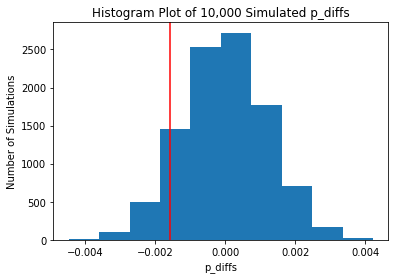

In [122]:
obs_diff = treatment_p - control_p

plt.hist(p_diffs)

plt.ylabel('Number of Simulations')
plt.xlabel('p_diffs')
plt.title('Histogram Plot of 10,000 Simulated p_diffs');
plt.axvline(x = obs_diff, color = 'red');


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [123]:
p_diffs = np.array(p_diffs)
act_diffs = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()

print ('p_diff = ',p_diffs, '\n\n', 'Actual difference =',act_diffs)

print ('\n\n','The proportion of p_diffs that is greater than actual difference =',(p_diffs > act_diffs).mean())


p_diff =  [ 0.00198009  0.00067927 -0.00201885 ... -0.00056646  0.00032149
 -0.00075918] 

 Actual difference = -0.0015782389853555567


 The proportion of p_diffs that is greater than actual difference = 0.9049


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?


**After stating our hypothseses, we calculated samples of the null hypothesis dsitrbution. When calculated p_diffs, the resulted array values are greater than the actual differece by 0.904. That value called the p_value, which means that 90.4% of the differences in the means are higher than the actual obsereved difference.**
***

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [128]:
import statsmodels.api as sm

convert_old = df2[df2['group'] == 'control'].converted.sum()
convert_new = df2[df2['group'] == 'treatment'].converted.sum()
n_old = df2[df2['group'] == 'control'].converted.size
n_new = df2[df2['group'] == 'treatment'].converted.size
print (convert_old,convert_new,n_old,n_new)

17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [133]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print ('z_score =',z_score,'\n','p_value =' ,p_value)

z_score = 1.3109241984234394 
 p_value = 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score of 1.3109241984234394 which falls in between 1st and 2nd standard deviations. Also since p_value is 0.905 which is greater than the alpha value of 0.05, thus so we accep the null hypothesis.**

***

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression model.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [135]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [137]:
 df2.shape

(290584, 5)

In [138]:
df2['intercept'] = 1

df2[['drop', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop(['drop'], axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [139]:
import statsmodels.api as sm

logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [140]:
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 20 Jul 2019   Pseudo R-squ.:               8.077e-06
Time:                        23:00:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The associated p_value with ab_page in this regression model is 0.19. 
Using a logistic regression, testing the null hypothesis ($H_0$) yielded a no relation between the conversion rate and new page. So, the alternative hypothsis ($H_1$)states the relationship.**<br>
**In part II, $H_0$ is the conversion propability for a user receiving the new page is less than or equal to the propability of conversion for a user receiving the old one. With $H_1$ being the propability of a user receiving the new page is greater than the propability of conversion for a user receiving the old page.**<br>

**Thus in part II if the page treatment group receives the new page, that would lead to more conversions. Which unlike the hypotheses in part III is that it will assume a much less difference in p-values.**





<br>Additional:<br>
The one-tailed test provides more power to detect an effect in one direction by not testing the effect in the other direction.

A two-tailed test will test both if the mean is significantly greater than x and if the mean significantly less than x.

***

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**The more factors we add, the more solid the regression model will get. For example, if we consider about the possibilities of different inputs from different entities that would definitely enrich the outcome, which seen as an advantage. In the other hand, the more data we add the harder and more time will take to handle it. In addition, there is always some risk that we might get overwhelmed and some errors may occur.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [155]:

countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [159]:
### Create the necessary dummy variables
df_new[['US', 'UK', 'CA']] = pd.get_dummies(df_new['country'])

logit_mod_new = sm.Logit(df_new['converted'],\
    df_new[['intercept', 'ab_page', 'US', 'UK']])

results_new = logit_mod_new.fit()

results_new.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 21 Jul 2019   Pseudo R-squ.:               2.323e-05
Time:                        04:24:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [160]:
np.exp(-0.0408), np.exp(0.0099)


(0.9600211149716509, 1.0099491671175422)

The results it definitly affected by the users' country nad location. As some users are more likely going to convert than others in other country, although in our case its not that significant of a difference.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [163]:
#The new pages will be represented to the user as follow
df_new['new_CA'] = df_new['ab_page'] * df_new['CA']
df_new['new_UK'] = df_new['ab_page'] * df_new['UK']
df_new['new_US'] = df_new['ab_page'] * df_new['US']

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA,new_CA,new_UK,new_US
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [166]:
lin_mod = sm.OLS(df_new['converted'], \
    df_new[['intercept', 'ab_page', 'US', 'new_US', 'UK', 'new_UK']])
results = lin_mod.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.466
Date:                Sun, 21 Jul 2019   Prob (F-statistic):              0.197
Time:                        04:27:25   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290578   BIC:                         1.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1206      0.001    118.563      0.000       0.119       0.123
ab_page       -0.0022      0.001     -1.505      0.132      -0.005       0.001
US            -0.0018      0.004     -0.467      0.641      -0.010       0.006
new_US        -0.0047      0.006     -0.845      0.398      -0.016       0.006
UK            -0.0006      0.002     -0.307      0.759      -0.004       0.003
new_UK         0.0033      0.003      1.180      0.238      -0.002       0.009
==============================================================================
Omnibus:                   125549.436   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414285.945
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
log_mod2 = sm.Logit(df_new['converted'], \
    df_new[['intercept', 'ab_page', 'US', 'new_US', 'UK', 'new_UK']])
results_log2 = log_mod2.fit()
results_log2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 21 Jul 2019   Pseudo R-squ.:               3.482e-05
Time:                        04:29:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
US            -0.0175      0.038     -0.465      0.642      -0.091       0.056
new_US        -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
new_UK         0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [169]:
np.exp(-0.0047), np.exp(0.0033)

(0.9953110277164796, 1.0033054509944446)

In [170]:
np.exp(-0.0469), np.exp(0.0314)

(0.9541828111007262, 1.0318981806179213)

So in both models we see minimal change or effect given different ways of interactions. So, no significant changes in the results. 

<a id='conclusions'></a>
## Conclusions

Overall, p_values in all examples were not significant, thus it seems smae situation between old vs. new pages when it comes to where you live. However, this maybe applicable only on our dataset, its encouraged to always test each provided data as each has it is own properties.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

***
### Resources:
https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html
https://www.statsmodels.org/stable/gettingstarted.html
https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html
https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.html
https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/